In [175]:
# THe usual imports for stuff like this
import numpy as np
import matplotlib.pyplot as plt

# This is a library for making animation with matplotlib easily
from celluloid import Camera

# Set some parameters to make our picture look pretty!
plt.rcParams['font.size'] = 16
plt.rcParams['figure.dpi'] = 120
plt.style.use('seaborn-pastel')

In [176]:
# Some constants for the problem
# Masses of boxes
m1 = 5
m2 = 10

# Gravitational acceleration
g = 9.8

# Radius of pulley
R = 3
# Mass of the pulley
mp = 2

# Some parameters that affect how much we want to simulate
# I choose these mostly through trial and error to get the simulation
# to look how I wanted it to
dt = .04
totalSteps = 100

In [177]:
# Calculate the moment of inertia of the pulley, assuming it is a 2D disk
I = 1/2 * mp * R**2

In [178]:
# Establish some variables for drawing the picture
baseBoxSize = 5
stringWidth = .3

# Initial positions of the boxes
y = [30, 15]
x = [5, 5 + 2*R] # x only matters for making the graphic look pretty

# Position of the pulley (really only matters for making the graphic look pretty)
yp = 50
xp = x[0]+R

In [179]:
# The second derivative of x with respect to time (aka acceleration)
# In this case, it is just a constant, make the discretization really easy!
def xdd():
    return g*(m1 - m2) / (m1 + m2 + I/R**2)

# Initialize our array, and set the initial values
yArr = np.zeros([2, totalSteps])
yArr[:,0] = y

# Run the simulation
for i in range(1, totalSteps):
    yArr[0,i] = yArr[0,0] + 1/2*xdd()*(dt*i)**2
    yArr[1,i] = yArr[1,0] - 1/2*xdd()*(dt*i)**2

# If you'd like to see where the masses end up
#print(yArr[:,-1])

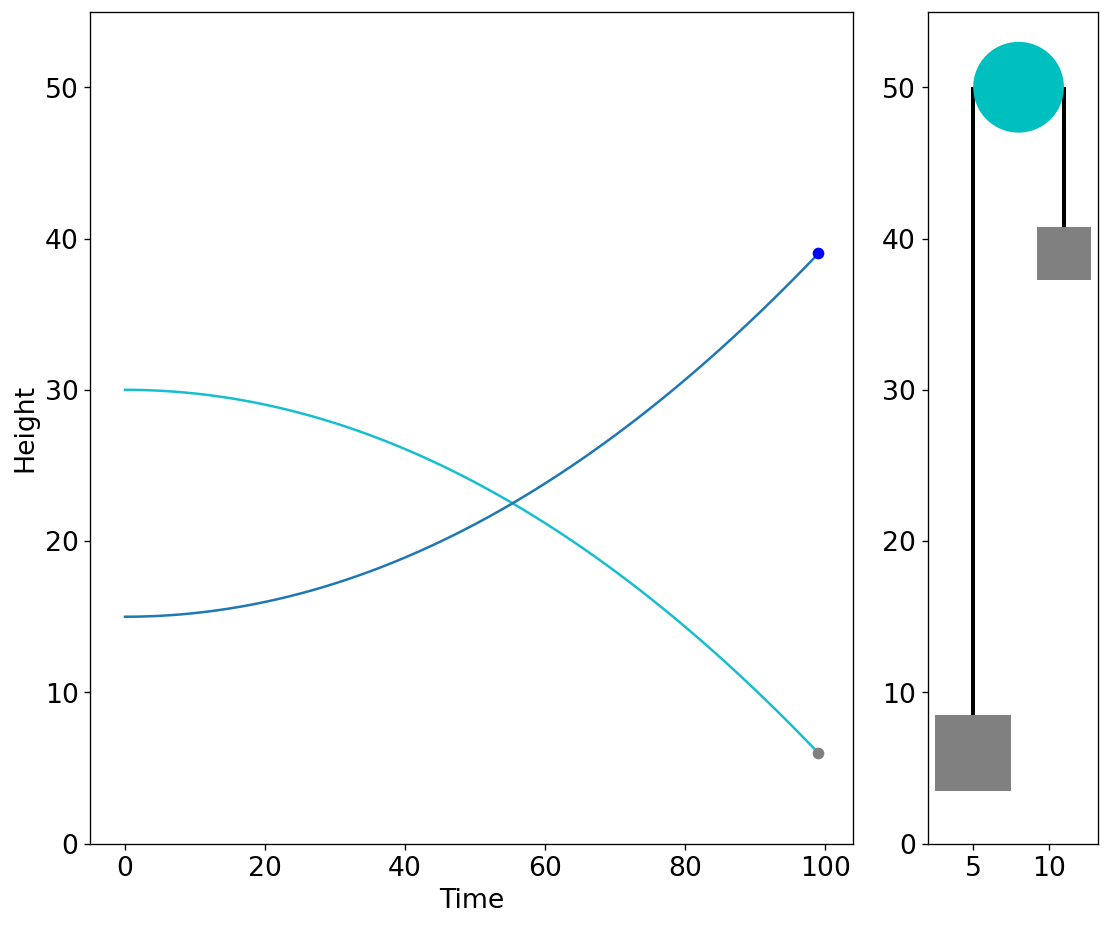

In [180]:
# We want to plot both the visualization and the positions of the masses side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

# The object that lets us create an animation (see docs for celluloid for more info)
camera = Camera(fig)


for i in range(len(yArr[0])):
    # Set the current positions of the boxes
    y = yArr[:,i]
    
    # Graph the positions of the boxes along a line on the left side
    ax[0].plot(range(len(yArr[0])), yArr[0], color='tab:cyan')
    ax[0].plot(range(len(yArr[1])), yArr[1], color='tab:blue')
    ax[0].plot(i, y[0], 'o', color='gray')
    ax[0].plot(i, y[1], 'o', color='blue')
    ax[0].set_xlabel("Time")
    ax[0].set_ylabel("Height")
    
    # Set up drawable objects for our two masses, and the pulley
    m1Draw = plt.Rectangle([x[0]-baseBoxSize/2, y[0]-baseBoxSize/2], baseBoxSize, baseBoxSize, fc='gray')
    # Note that the size of the second box automatically changes based on the ratio of the masses
    # (so things look somewhat realistic)
    m2Draw = plt.Rectangle([x[1]-baseBoxSize/2*np.sqrt(m1/m2), y[1]-baseBoxSize/2*np.sqrt(m1/m2)], baseBoxSize*np.sqrt(m1/m2), baseBoxSize*np.sqrt(m1/m2), fc='gray')
    pulleyDraw = plt.Circle([xp, yp], R, fc='c')
    m1String = plt.Rectangle([x[0]-stringWidth/2, y[0]], stringWidth, yp-y[0], fc='black')
    m2String = plt.Rectangle([x[1]-stringWidth/2, y[1]], stringWidth, yp-y[1], fc='black')

    # Add all of our objects to the right side of the plot
    ax[1].add_patch(m1String)
    ax[1].add_patch(m2String)
    ax[1].add_patch(m1Draw)
    ax[1].add_patch(m2Draw)
    ax[1].add_patch(pulleyDraw)

    # Make the axis on both sides the same, so that the lines actually track the graphics
    # of the boxes
    plt.axis('scaled')
    ax[0].set_ylim([0, yp+5])
    ax[1].set_ylim([0, yp+5])

    # Take a picture of our frame to add to the animation later
    fig.tight_layout()
    camera.snap()
    
# Create our animation, and save it later
# An interval of 50ms means that we have 20 fps (not too bad!)
animation = camera.animate(interval=50) 
animation.save('atwood_machine.gif', writer='imagemagick')